In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

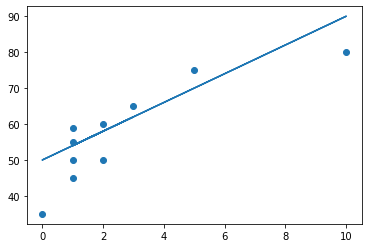

In [5]:
plt.scatter(X[1,:], y)
plt.plot(X[1,:], 50 + 4*X[1,:])

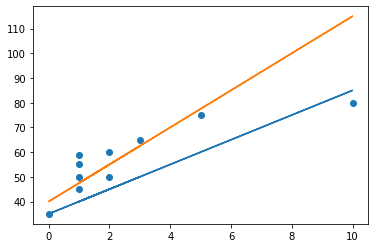

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [7]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [9]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [10]:
err1, err2

(9.4, -2.1)

In [11]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [12]:
mae_1, mae_2

(10.4, 7.9)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [14]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [15]:
X.shape

(2, 10)

In [16]:
X.T.shape

(10, 2)

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

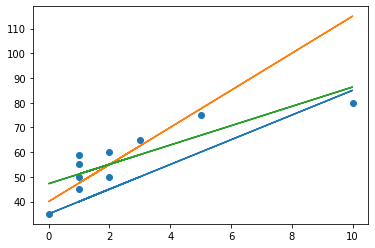

In [18]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [19]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [20]:
calc_mse(y, y_pred1)

143.6

In [21]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [22]:
calc_mae(y, y_pred1)

10.4

In [23]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mse(y, y_pred3)

45.93749999999999

In [25]:
calc_mae(y, y_pred3)

6.182142857142856

Градиентный спуск

In [26]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [27]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [28]:
W[0] - g


47.23214306050001

1. Подберите скорость обучения (alpha) и количество итераций:

In [29]:
n = X.shape[1]
alpha = 0.05
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.05)

In [30]:

#     print(alpha/10000)



In [31]:

err_global_old = 9999999999999999999999999999999
for alpha in range (1, 1001, 1): #Перебираю alpha
    n = X.shape[1] # Количество наблюдений
    err_old = 9999999999999999999999999999999
    W = np.array([1, 0.5]) #Веса
#     W, alpha
    alpha = alpha/10000 #Скорость обучения
    for i in range(100000): #Произвожу обучение в цикле
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred) #Смотрю квадратичную ошибку
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    
        if (err/err_old > 0.9999):
            #Прерываю обучение когда результат начинает изменяться незначительно
#             print(f"Прерываю обучение на параметрах: {alpha, W, err}")
            break;
        err_old=err
    if (err/err_global_old > 0.9999):
        #Прерываю обучение на достигнутом alpha, когда изменение MSE становится незначительным
        print(f"Улучшение модели становится незначительным при достижении: \n alpha={alpha} \n Результат: \n W: {W} \n err:{err}")
        break;
    else:
        print(f"Текущий результат: {alpha, W, err}")
    err_global_old=err
    

Текущий результат: (0.0001, array([38.33704846,  5.55326151]), 88.48410228286977)
Текущий результат: (0.0002, array([42.03339217,  4.87070337]), 60.473739567922834)
Текущий результат: (0.0003, array([43.1968407,  4.6558637]), 54.697347536400684)
Текущий результат: (0.0004, array([43.81762131,  4.54123181]), 52.21077735874286)
Текущий результат: (0.0005, array([44.22022144,  4.46688862]), 50.81966443959937)
Текущий результат: (0.0006, array([44.50709891,  4.4139145 ]), 49.9347611107609)
Текущий результат: (0.0007, array([44.72504204,  4.37366963]), 49.32164893554183)
Текущий результат: (0.0008, array([44.89903045,  4.34154134]), 48.868849361730355)
Текущий результат: (0.0009, array([45.04008168,  4.31549515]), 48.52566519052989)
Текущий результат: (0.001, array([45.15929201,  4.29348205]), 48.25229833675777)
Текущий результат: (0.0011, array([45.26180794,  4.2745517 ]), 48.029432050382574)
Текущий результат: (0.0012, array([45.34949531,  4.25835956]), 47.84777517862378)
Текущий результа

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [32]:

err_global_old = 9999999999999999999999999999999
for alpha in range (1, 1001, 1): #Перебираю alpha
    n = X.shape[1] # Количество наблюдений
    err_old = 9999999999999999999999999999999
    W = np.array([1, 0.5]) #Веса
#     W, alpha
    alpha = alpha/10000 #Скорость обучения
    for i in range(100000): #Произвожу обучение в цикле
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred) #Смотрю квадратичную ошибку
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    
        if (err/err_old > 0.9999):
            #Прерываю обучение когда результат начинает изменяться незначительно
#             print(f"Прерываю обучение на параметрах: {alpha, W, err}")
            break;
        err_old=err
    if (err/err_global_old > 0.9999):
        #Прерываю обучение на достигнутом alpha, когда изменение MSE становится незначительным
        print(f"Улучшение модели становится незначительным при достижении: \n alpha={alpha} \n Результат: \n W: {W} \n err:{err}")
        break;
    else:
        print(f"Текущий результат: {alpha, W, err}")
    err_global_old=err
    

Текущий результат: (0.0001, array([38.33704846,  5.55326151]), 88.48410228286977)
Текущий результат: (0.0002, array([42.03339217,  4.87070337]), 60.473739567922834)
Текущий результат: (0.0003, array([43.1968407,  4.6558637]), 54.697347536400684)
Текущий результат: (0.0004, array([43.81762131,  4.54123181]), 52.21077735874286)
Текущий результат: (0.0005, array([44.22022144,  4.46688862]), 50.81966443959937)
Текущий результат: (0.0006, array([44.50709891,  4.4139145 ]), 49.9347611107609)
Текущий результат: (0.0007, array([44.72504204,  4.37366963]), 49.32164893554183)
Текущий результат: (0.0008, array([44.89903045,  4.34154134]), 48.868849361730355)
Текущий результат: (0.0009, array([45.04008168,  4.31549515]), 48.52566519052989)
Текущий результат: (0.001, array([45.15929201,  4.29348205]), 48.25229833675777)
Текущий результат: (0.0011, array([45.26180794,  4.2745517 ]), 48.029432050382574)
Текущий результат: (0.0012, array([45.34949531,  4.25835956]), 47.84777517862378)
Текущий результа

In [66]:
n = X.shape[1]
alpha = 0.01
W = np.array([1, 0.5])
W, alpha
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for ii in range(W.shape[0]):
#         W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
#     print(y_pred - y)
#     print(X * (np.array([[y_pred - y], [y_pred - y]])))
#     print(np.sum(np.multiply(X, (y_pred - y))))
#     W = np.absolute(np.array(W) - np.array([alpha * (1/n * 2 * np.sum(X * (y_pred - y)))])) 
#     W[0] -= alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y)))
#     W[1] -= alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))
#     W -= [alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y))), alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))]
#     print(f"W ={W}")
#     print(f"y_pred - y ={y_pred - y}")
#     print(f"X[0] * (y_pred - y) = {X[0] * (y_pred - y)}")
#     print(f"X[1] * (y_pred - y) = {X[1] * (y_pred - y)}")
#     print(f"X * (y_pred - y) = {X * (y_pred - y)}")
#     print(f"np.sum(alpha * (1/n * 2 * X[0] * (y_pred - y))) = {alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y)))}")
#     print(f"np.sum(alpha * (1/n * 2 * X[1] * (y_pred - y))) = {alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))}")
#     print(f"np.sum(alpha * (1/n * 2 * X * (y_pred - y))) = {alpha * (1/n * 2 * np.sum(X * (y_pred - y)))}")
#     print(f"W[0] -= alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y))) = {W[0] - alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y)))}")
#     print(f"W[1] -= alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y))) = {W[1] - alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))}")
#     print(f"W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y))) = {W - np.full(len(W),alpha * (1/n * 2 * np.sum(X * (y_pred - y))))}")
#     print(f"2={W-np.array([alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y))),alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))])}")
#     W -= np.full(len(W),alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
#     W = np.absolute(np.array(W) - np.array([alpha * (1/n * 2 * np.sum(X * (y_pred - y)))])) 
#     print(i, W, err)
#     print(f"1/n={1/n}")
#     print(f"X={X}")
#     print(y_pred, y)
#     W -= 10

# После ОЧЕНЬ долгих и потных попыток найти ошибку :)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1))



    if i % 100 == 0:
        print(i, W, err)
#         break;

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
